# BCB546 Python Assignment - Mudith Ekanayake

In [1]:
# Importing all the packages

from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating a class so the output text can be visualized with bold text, underlined text etc.

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## FUNCTIONS ##

# 1 #
### GETTING THE SEQUENCES

In [3]:
def get_sequences_from_file(fasta_fn): #1
    sequence_data_dict = {} #2
    for record in SeqIO.parse(fasta_fn, "fasta"): #3
        description = record.description.split() #4
        species_name = description[1] + " " + description[2] #5
        sequence_data_dict[species_name] = record.seq #6
    return(sequence_data_dict) #7

A function is defined by the `def` keyword. An empty dictionary is declared by `sequence_data_dict = {}` and SeqIO reads the sequences from FASTA files and store the data in a SeqRecord. SeqIO also provides tools for writing sequence data to a file. `record.description.split()` splits all the words in the description of the record. 5th line takes the second word and the third word as the species name. 6th line adds the species name and the sequence to the dictionary and the final line return the resulting dictionary.



In [4]:
bears_seq = get_sequences_from_file("bears_cytb.fasta") # using the function to get the sequences
bears_seq

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA'),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA'),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA'),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA'),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA'),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA'),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA'),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...AGA')}

# 2 #
### STRING-TRANSLATE FUNCTION ###

In [5]:
def translate_seq(NA): # define the function
    verte_mito = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # get the genetic codon table for Vertebrate Mitochondrial
    amino_acid = '' # empty variable for the amino acid sequence
    for i in range(0, len(NA), 3): # for loop iterate from the initial NA to last NA with increments of 3
        codon = NA[i : i+3] # get the exact codon at the position i
        if codon not in verte_mito.stop_codons and len(codon) == 3:
            amino_acid += verte_mito.forward_table[codon] # if the codon is not a stop codon and if it has 3 NAs add AAs to the sequence
            
    return(amino_acid) #return the amino acid sequence

In [6]:
seq = "TGATAATGTCGATGCGATCGTGTGTGTGCTAGCGAGCTATGTGCTAGT" # sequence of interest
translated_seq = translate_seq(seq) # use the translate function
print (color.BOLD + translated_seq + color.END) # print the output with bold text

WCRCDRVCASELCAS


# 3 #
### ALTERNATIVE FUNCTION ###

In [7]:
def translate_function(NA): # define the function
    from Bio.Seq import Seq # import seq from Bio.Seq package
    seq = Seq(NA) # Save the sequence as a Seq object
    amino_acid = seq.translate(table=2, to_stop=True) # translate the sequence using the genetic code 2 and stop the translation when a stop codon is encountered
    return(str(amino_acid)) # return the amino acid sequence

In [8]:
translated_aa = translate_function("atgtcgtacgtcgacgtcgacgtcgacgtttgcggggacgtc") # sequence of interest
print (color.BOLD + translated_aa + color.END) # print the output with bold text

MSYVDVDVDVCGDV


# 4 #
### COUNT AA ANALYSIS FUNCTION ###

In [9]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def mol_weight(amino_acid): # define the function
    molecular_weight = ProteinAnalysis(amino_acid).molecular_weight() # ProteinAnalysis() analyses the amino acid sequence and molecular_weight() calculate the weight
    return(molecular_weight) # return the calculated molecular weight

In [10]:
molecular_weight = mol_weight(translated_aa) # using the function
print (molecular_weight) # print molecular weight

1515.6605999999995


# 5 #
### GC CONTENT ANALYSIS FUNCTION ###

In [11]:
from Bio.SeqUtils import GC # import the GC function from Sequtils

def gc_content(NA): # define the function
    gc_cont = GC(NA) # calculate the GC content from the sequence
    return(gc_cont) # return the calculated GC content

In [12]:
gc_perc = gc_content(seq) # using the function
print (gc_perc) # print the GC content

47.916666666666664


#   MAIN   #

In [13]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)

# 6 #
### ADDING TWO NEW COLUMNS AND SETTING VALUES TO 'NaN' ###

In [14]:
bears_df['molecular_weight'] = float("NaN") # add molecular_weight column and assign the value as float NaN
bears_df['gc_content'] = float("NaN") # add gc_content column and assign the value as float NaN

# 7 #
### TRANSLATE EACH SEQUENCE AND GET MOLECULAR WEIGHT AND COMPUTE GC CONTENT ###

In [15]:
for key in cytb_seqs: # iterate through the key
    na_seq = str(cytb_seqs[key]) # get sequence data in the dictionary and make them strings
    aa_seq = translate_seq(na_seq) # use the translate function from 2 and translate the NA sequence
    bears_df.loc[bears_df.species == key,'molecular_weight'] = mol_weight(aa_seq) # compute molecular weight and add it to the molecular_weight column for each species
    bears_df.loc[bears_df.species == key,'gc_content'] = gc_content(na_seq) # compute gc_content and add it to the gc_content column for each species


In [16]:
bears_df # view the dataframe

,species,mass,molecular_weight,gc_content
0,Ursus spelaeus,550.800,42458.7992,43.771930
1,Ursus arctos,203.500,42414.7435,43.771930
2,Ursus thibetanus,99.714,42306.6735,45.614035
3,Melursus ursinus,100.030,42551.9900,45.175439
4,Ursus americanus,110.560,42427.7439,43.947368
5,Helarctos malayanus,47.020,42560.8910,44.298246
6,Ailuropoda melanoleuca,118.200,42702.1845,40.789474
7,Tremarctos ornatus,140.700,42384.8266,44.385965
8,Ursus maritimus,425.100,42454.7873,44.298246


# 8 #
### BAR-CHART OF THE MASS WITH THE X-AXES LABLED WITH SPECIES NAMES ###

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Mass')

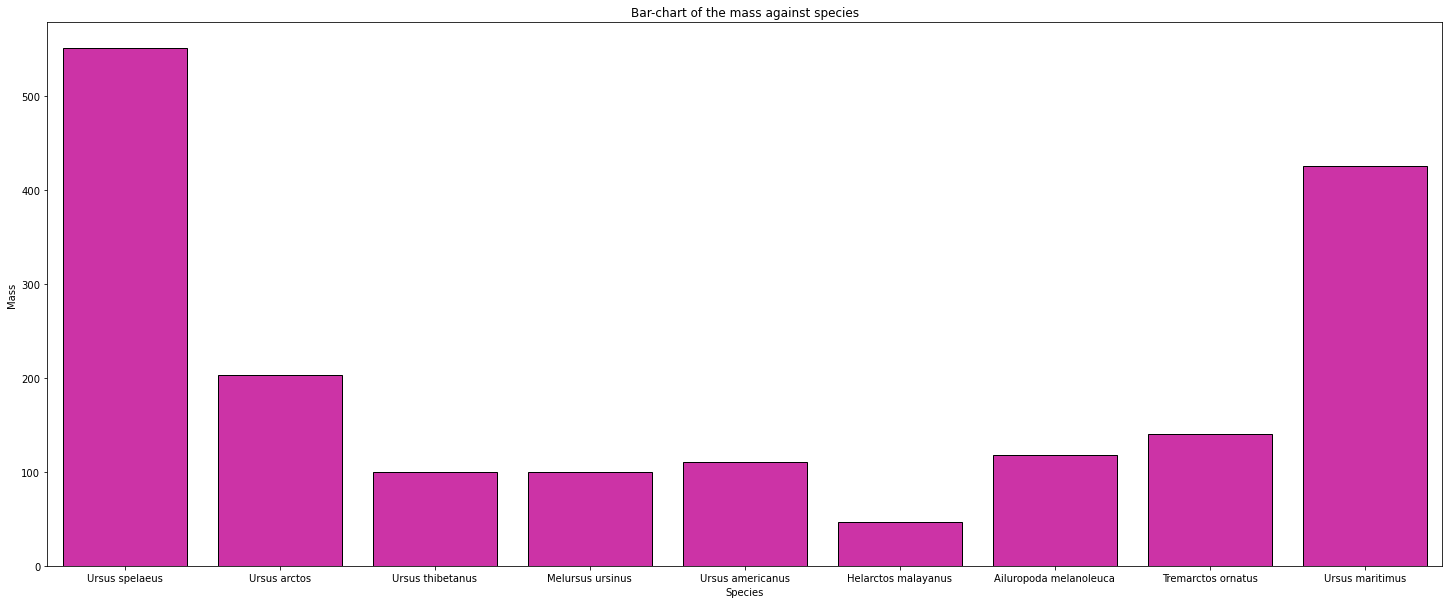

In [17]:
fig, ax = plt.subplots(figsize = (25, 10)) # add dimensions to the graph

# bar-chart of mass against species
# color=(0.9, 0.1, 0.7, 0.9) set the color of the plot
# edgecolor='black' set the edges of the bars to black
sns.barplot('species','mass', data = bears_df, color = (0.9, 0.1, 0.7, 0.9), edgecolor = 'black')

plt.title('Bar-chart of the mass against species') # set the title
plt.xlabel('Species') # set the X axis label
plt.ylabel('Mass') # set the Y axis label

*Q1* What is the largest bear species? 

***Ursus spelaeus* is the largest bear species**

*Q2* What else is interesting about this species?

**The common name of *Ursus spelaeus* is cave bear and it has lived during the Pleistocene and it has become extinct during the Last Glacial Maximum. According to Mattson 2019, *Ursus spealaeus* is more closely related to *Ursus arctos* and *Ursus maritimus*. It is interesting to see that those two species are the ones which have next highest masses. But however, according to the paper, Ursus arctos is the most closely related one than Ursus maritimus.**

**Refernece: Mattson, David. (2019). Comments on the US Fish & Wildlife Service proposal to remove grizzly bears in the Yellowstone ecosystem from the list of endangered and threatened wildlife protected under the US Endangered Species Act (ESA); Federal Register 81(48): 13174-13227.**

# 9 #
### VISUALIZATION OF THE MOLECULAR WEIGHT (Y-AXIS) AS A FUNCTION OF GC-CONTENT (X-AXIS)

Text(-6.289999999999999, 0.5, 'Molecular Weight')

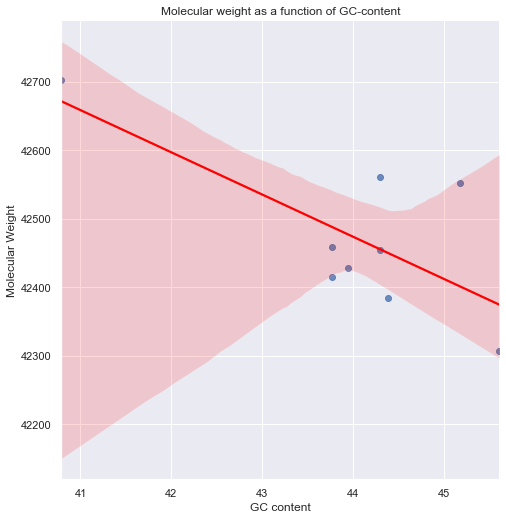

In [18]:
import seaborn as sns; sns.set_theme(color_codes=True)

# plot the graph
# line_kws={'color': 'red'} gives Red color to the line
# height and aspect give the size and dimension to the graph
fig, sns.lmplot(data = bears_df, x = 'gc_content', y = 'molecular_weight', height = 7, aspect =1, line_kws={'color': 'red'})

plt.title('Molecular weight as a function of GC-content') # set the title
plt.xlabel('GC content') # set the X axis label
plt.ylabel('Molecular Weight') # set the Y axis label

# 10 #
### SAVING THE NEW DATAFRAME TO A FILE ###

In [19]:
bears_df.to_csv("bears_mass_cytb.csv", index = False)

# 11 - BONUS #
## POLTTING THE AMINO ACID DISTRIBUTION OF THE SEQUENCE
### TRANSLATE THE NA SEQUENCE USING A DIFFERENT APPROACH ###

In [20]:
from Bio.SeqRecord import SeqRecord

with open("aa_seq.fasta", 'w') as aa_fa: # open the file to be written the resulting AA sequence
    for dna_record in SeqIO.parse("bears_cytb.fasta", 'fasta'): # get the sequences
        
        dna_seqs = [dna_record.seq, dna_record.seq.reverse_complement()] # use both fwd and rev sequences

        aa_seqs = (s[i:].translate(to_stop=True) for i in range(3) for s in dna_seqs) # generate all translation frames

        max_aa = max(aa_seqs, key=len) # select the longest one

        aa_record = SeqRecord(max_aa, id=dna_record.id, description="translated sequence") # write new record
        SeqIO.write(aa_record, aa_fa, 'fasta')

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


### GET THE TRANSLATED AMINO ACID SEQUENCES ###

In [21]:
import pprint

with open('aa_seq.fasta') as f: # open the translated amino acid sequence
    ret = {}

    all_aa = '' # empty variable for all_aa
    aa = '' # empty variable for amino acids
    description_line = '' # empty variable for description line
    for l in f:
        l = l.strip() # removes any leading (spaces at the beginning) and trailing (spaces at the end) characters
        if l.startswith('>'): # start with the '>' symbol
            # get the description line
            if aa:
                ret[description_line] = aa
                aa = ''
            description_line = l
        else:
            aa += l
            all_aa += l
    if aa:
        ret[description_line] = aa

pprint.pprint(ret) # return the sequences

{'>AB020907.1 translated sequence': 'MTNIRKTHPLAKIINNSLIDLPTPSNISA',
 '>AB360958.1 translated sequence': 'MTNIRKTHPLAKIINNSLIDLPAPSNISA',
 '>AF264047.1 translated sequence': 'MTNIRKTHPLAKIINNSFIDLPTPSNISA',
 '>AF268271.1 translated sequence': 'MTNIRKTHPLAKIINNSLIDLPTPSNISA',
 '>EU567096.1 translated sequence': 'MTNIRKTHPLAKIINNSFIDLPTPSNISA',
 '>U18899.1 translated sequence': 'MTNIRKTHPLAKIINNSLIDLPAPSNISA',
 '>U23552.1 translated sequence': 'MINIRKTHPLVKIINNSFIDLPTPSNIST',
 '>U23554.1 translated sequence': 'MTNIRKTHPLAKIINSSFIDLPTPSNISA',
 '>U23562.1 translated sequence': 'MTNIRKTHPLAKIINNSLIDLPAPSNISA'}


### COUNT THE NUMBER OF AMINO ACIDS IN THE SEQUENCE ###

In [22]:
from collections import Counter
aa_count = (Counter(all_aa)) # count the amino acids
print (aa_count) # print the counted amino acids

Counter({'I': 46, 'N': 35, 'S': 28, 'P': 27, 'T': 24, 'L': 23, 'A': 19, 'K': 18, 'M': 9, 'R': 9, 'H': 9, 'D': 9, 'F': 4, 'V': 1})


### PLOTTING THE AMINO ACID DISTRIBUTION ###

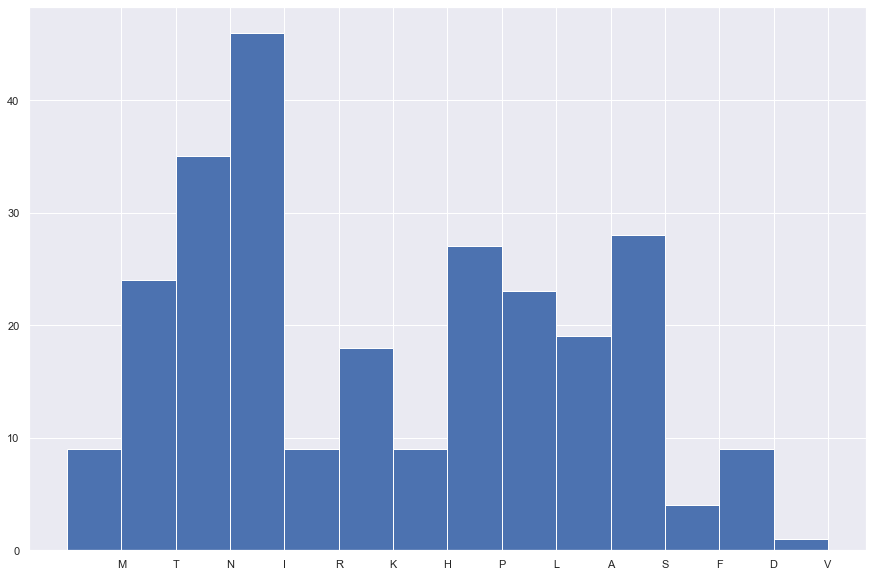

In [23]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*aa_count.items()) # get the values and labels

indexes = np.arange(len(labels)) # make the indices
width = 1 # set the width

fig, ax = plt.subplots(figsize = (15, 10)) # add dimensions to the graph

plt.bar(indexes, values, width) # plot the bar chart
plt.xticks(indexes + width * 0.5, labels) # get and set the current tick locations and labels of the x-axis
plt.show() # shows the plot